In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# ___Multi Class Classification___
---------

In [1]:
# So far we only have focused on binary classification, where the output is either the positive
# or negative class.

In [2]:
# In real world situations, the target often consists of multiple categories.
# Sklearn handles multi-class classifictaion problems by convetring them into a series of binary classification problems.

# For example if the target in the training set has 4 different labels A, B, C & D
# Sklearn makes 4 classifiers -> 
    # 1 - one that predicts A or not A (this predicts A aginst all the 3 remaining classes)
    # 2 - one that predicts B or not B
    # 3 - C or not C
    # 4 - D or not D
    
# So, Sklearn learns 4 different binary classifiers.
# To predict a new data instance, it takes in the input, and runs it against all the 4 binary classifiers and gets their scores.
# Then uses the prediction of the classifier that has given the highest score.

In [ ]:
# Let's take a look at this using the fruits dataset,

In [16]:
fruits = pd.read_csv(r"../resources/assets/fruit_data_with_colors.txt", delimiter = "\t")

In [48]:
features = fruits.loc[:, ["width", "height"]]
targ = fruits.fruit_label

In [49]:
train_x, test_x, train_y, test_y = train_test_split(features, targ, train_size = .7)

In [50]:
mulLinSVC = LinearSVC(C = 10, max_iter = 10000).fit(train_x, train_y)

C:\Program Files\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [51]:
mulLinSVC.coef_

array([[ 0.87089998, -0.32691546],
       [ 1.33085038, -1.88537759],
       [ 0.38305087,  0.01236115],
       [-2.05303296,  1.36962922]])

In [52]:
mulLinSVC.intercept_

array([-4.14593809,  1.36784204, -3.09358429,  2.79706473])

In [53]:
mulLinSVC.score(test_x, test_y)

0.6666666666666666

In [55]:
fruits.fruit_name.unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [74]:
clrdict = {"apple": "red", "lemon": "yellow", "orange": "orange", "mandarin": "green"}

clrs = list(map(lambda x: clrdict.get(x), fruits.fruit_name))

In [75]:
# The four pairs of coefficients here correspond to the 4 fruit varieties.

# the first pair of coefficients could be from a classifier that classifies -> apples - not apples (with the first intercept)
# the second -> mandarins - not mandarins
# etc..

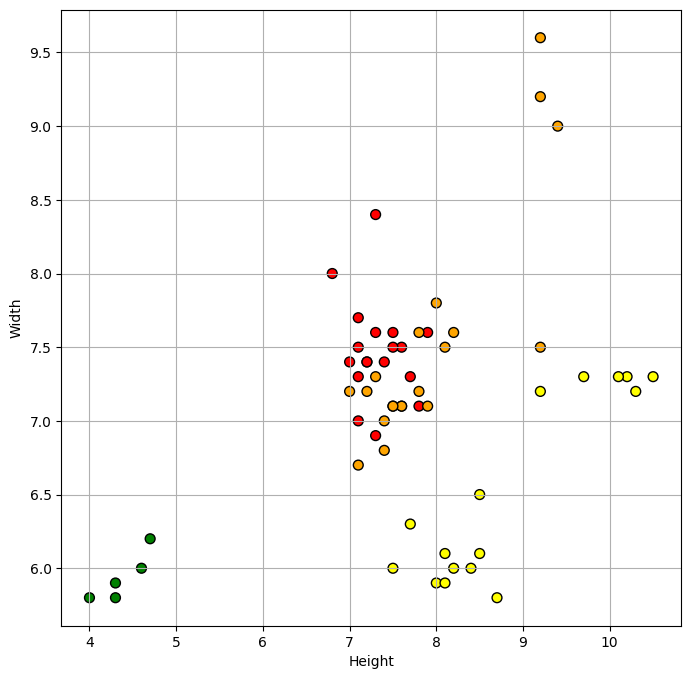

In [76]:
fig, axes = plt.subplots()
fig.set_size_inches(8, 8)

axes.scatter(fruits.height, fruits.width, c = clrs, edgecolor = "black", s = 50)
axes.grid()
axes.set_xlabel("Height")
axes.set_ylabel("Width")



plt.show()